# Защита персональных данных клиентов

## Загрузка данных

In [1]:
import numpy as np
from numpy.linalg import inv
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
try:
    df = pd.read_csv('/datasets/insurance.csv')
    
except:
    df =  pd.read_csv('C:/documents/datasets/insurance.csv')

In [3]:
display(df)
display(df.info())
display(df.describe())
display(df.duplicated().value_counts())
display(df['Пол'].value_counts())
display(df['Страховые выплаты'].value_counts(normalize=True))

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


False    4847
True      153
dtype: int64

0    2505
1    2495
Name: Пол, dtype: int64

0    0.8872
1    0.0846
2    0.0230
3    0.0036
4    0.0014
5    0.0002
Name: Страховые выплаты, dtype: float64

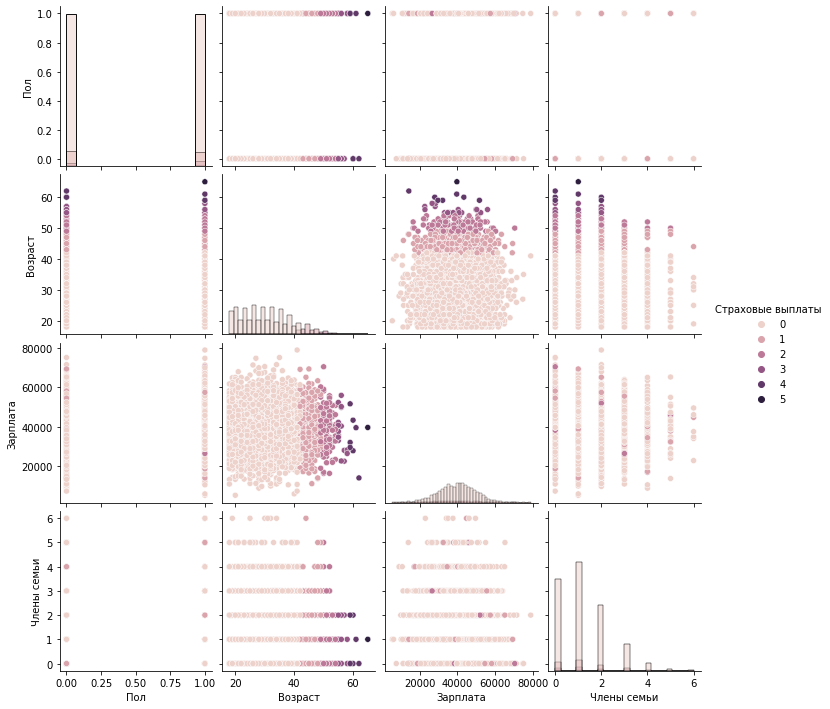

In [4]:
sns.pairplot(df, hue='Страховые выплаты', diag_kind='hist');

В датасете 5 тыс данных клиентов. С типами данных все в порядке, пропусков нет, есть 153 дуюликата, но возможно это не дубликаты, тк данных не хватает, для точной установки этого факта. Средний возвраст 30 лет (от 18 до 65 оет), средняя зарплата 39 тыс (от 5.3 до 79 тыс), в среднем 1 член семьи (0 до 6). Соотношение пола 0 и 1 примерно 50 на 50. Стаховых случаев в среднем 0 (от 0 до 5). В 89% без страховых случаев, в 8% - 1 страх. случай, в 2% - 2 случая, 3-5 случаев суммарно 0.5%. На хитмэпе видим что больше всего страховые выплаты зависят от возраста.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Заменим матрицу X на Z = XM (умноженную на обратимую матрицу M)

$$
a1 = Zw1 = XM((XM)^T XM)^{-1} (XM)^T y = XM((M^T X^T X M)^{-1} M^T X^T y = XM M^{-1} ((X^T X)^{-1} M^T^{-1} M^T X^T y = 
X E ((X^T X)^{-1} E X^T y = X (X^T X)^{-1} X^T y
$$

Мы выновим М за скобки. M умноженное на обратную от M и M транспонированная умноженная на обратную - дадут единичные матрица при умножинии на которые ничего не меняется. 

$$
w1 =  ((XM)^T XM)^{-1} (XM)^T y = (M^T X^T X M)^{-1} M^T X^T y = M^{-1}(X^T X)^{-1} M^T^{-1}M^T X^T y = 
M^{-1}(X^T X)^{-1} E X^T y =  M^{-1}(X^T X)^{-1} X^T y = M^{-1}w
$$

Получается w свяхана от w1 обратной матрицей М

**Ответ:** При умножении параметров на обратимую матрицу каество предсказаний лин-ой регрессии ее изменится

**Обоснование:** Изменение качества предсказания не происходит при умножении признаков исходных данных, на обратимую матрицу, т.к. параметры линейной регрессии в исходной данных и в преобразованных связаны между собой алгоритмом, по которому предсказание вычисляется умножения признаков исходных данных на вектор длинной равной ширине таблицы признаков, который в свою очередь умножается на целевые признаки. 

## Алгоритм преобразования

**Алгоритм**

Создается случайная квадратная матрица, размер которой соответствует количеству признаков. Затем мы проверяется, является ли эта матрица обратимой. Далее умножются признаки на эту матрицу.

Для дальнейшей расшифровки данных требуется чтобы матрица обазетельно была обратимой

**Обоснование**

В разделе умножения матрц мы доказали, что умножение признков на обратимую матрицу не влияет на качество предсказаний модели. Поэтому мы можем делать эту операцию для скрытия персональных данных клиентов и безопаспно использовать эти зашифрованные данные для модели предсказаниий. 

## Проверка алгоритма

In [5]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']
train_features, test_features, train_target, test_target = train_test_split(features, target, 
                                                                            test_size=0.25, random_state=12345)
print(train_features.shape)
print(test_features.shape)
print(train_target.shape)
print(test_target.shape)

(3750, 4)
(1250, 4)
(3750,)
(1250,)


In [6]:
class LinearRegress:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    
model = LinearRegress()
model.fit(train_features, train_target)
predictions = model.predict(test_features)
print('R2 классса лин. регрессии', round(r2_score(test_target, predictions), 5))

R2 классса лин. регрессии 0.43523


In [7]:
model2 = LinearRegression()
model2.fit(train_features, train_target)
predictions2 = model2.predict(test_features)
print('R2 лин. регрессии sklearn:', round(r2_score(test_target, predictions2), 5))

R2 лин. регрессии sklearn: 0.43523


In [8]:
mat = np.array([[7, 5, 8, 6],
               [9, 9, 4, 2],
               [8, 1, 2, 5],
               [8, 7, 1, 9]])

inv(mat)

array([[-0.06989247,  0.06989247,  0.17204301, -0.06451613],
       [-0.00967742,  0.07634409, -0.15053763,  0.07311828],
       [ 0.15268817, -0.01935484, -0.03225806, -0.07956989],
       [ 0.05268817, -0.11935484, -0.03225806,  0.12043011]])

In [9]:
train_mat = train_features.dot(mat)
train_mat.columns = train_features.columns
test_mat = test_features.dot(mat)
test_mat.columns = test_features.columns

In [10]:
display(train_mat)
display(test_mat)

,Пол,Возраст,Зарплата,Члены семьи
3369,290002.0,36599.0,72581.0,181101.0
1441,461113.0,57911.0,115344.0,288074.0
571,329096.0,41395.0,82329.0,205573.0
225,361132.0,45431.0,90345.0,225581.0
2558,405113.0,50911.0,101334.0,253084.0
...,...,...,...,...
3497,257178.0,32478.0,64368.0,160584.0
3492,181884.0,22980.0,45516.0,113592.0
2177,357984.0,45081.0,89573.0,223597.0
3557,401030.0,50326.0,100292.0,250580.0


,Пол,Возраст,Зарплата,Члены семьи
3183,312329.0,39325.0,78136.0,195102.0
1071,345266.0,43564.0,86402.0,215618.0
2640,337158.0,42456.0,84364.0,210584.0
2282,278580.0,34980.0,69680.0,174040.0
1595,320401.0,40397.0,80168.0,200118.0
...,...,...,...,...
982,232482.0,29478.0,58214.0,145126.0
3820,463528.0,58223.0,115943.0,289599.0
3595,338722.0,42620.0,84748.0,211576.0
3513,330731.0,41629.0,82752.0,206578.0


In [11]:
model3 = LinearRegression()
model3.fit(train_mat, train_target)
predictions3 = model3.predict(test_mat)
print('R2 лин. регрессии преобр. данных:', round(r2_score(test_target, predictions3), 5))

R2 лин. регрессии преобр. данных: 0.43523


Была сделана произвольная матрица 4 на 4 - соответвтующая по длинне нашим выборкам обучаищим и тестовым и проверяем ее на обратимость - это нужно для того чтобы была возможность восстановить данные. Далее мы умножаем тренировочные и тестовые параметры на эту матрицу и делаем обучение и предсказание модели лин. регрессии. Параметр R2 полученный на данных до преобразования и после одинковые